# 03. Customer Segmentation (RFM) & Review Text Analysis

---

##  Introduction

After the general Exploratory Data Analysis (EDA), this notebook focuses on understanding customers at a deeper level. We will deploy two advanced analysis techniques:

1.  **RFM (Recency, Frequency, Monetary) Segmentation:** We will segment customers into distinct groups based on their purchasing behavior. This is a classic marketing technique to identify high-value customers, at-risk customers, and others, enabling targeted marketing strategies.
2.  **Text Analysis of Negative Reviews:** We will analyze the written content of 1-star and 2-star reviews to uncover the primary reasons for customer dissatisfaction beyond just delivery delays. This will provide actionable insights into operational pain points.

In [5]:
# --- 2. Setup and Imports ---

# Importing standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Adding the project's root directory to the Python path
import sys
sys.path.append('..')

# Importing our custom functions
from src.data_utils import load_processed
from src.viz import plot_scatter, plot_bar, plot_heatmap,plot_count, plot_line, plot_box, plot_stacked_bar, plot_bubble, pie_plot

# Configuring pandas and matplotlib for better display
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8-whitegrid')

print("Setup complete.")

Setup complete.


In [6]:
# --- 3. Loading Analytics-Ready Data ---

# Load the final, enriched dataframe from the processed folder
df_analytics = load_processed('analytics_main_data')

# --- Verification ---
print("--- Analytics Data Verification ---")
print(f"DataFrame loaded successfully. Shape: {df_analytics.shape}")
display(df_analytics.head())

Loading processed data from: /home/lucas/olist-data-analysis-project/notebooks/../data/processed/analytics_main_data.parquet
--- Analytics Data Verification ---
DataFrame loaded successfully. Shape: (118310, 44)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_value,shipping_time_days,total_delivery_time,shipping_delay_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,None,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,89.97,8,8,0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,118.70,13,13,0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,None,None,2018-08-18,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,159.90,9,9,0


---
## 1. RFM Customer Segmentation

We will now segment customers based on their Recency, Frequency, and Monetary value. The first step is to calculate these three metrics for each unique customer.

### 1.1. Calculate Recency, Frequency, and Monetary Values

In [7]:
client_info = df_analytics.groupby('customer_unique_id')
last_purchased = client_info['order_purchase_timestamp'].max()
last_purchased

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2   2018-05-10 10:56:27
0000b849f77a49e4a4ce2b2a4ca5be3f   2018-05-07 11:11:27
0000f46a3911fa3c0805444483337064   2017-03-10 21:05:03
0000f6ccb0745a6a4b88665a16c9f078   2017-10-12 20:29:41
0004aac84e0df4da2b147fca70cf8255   2017-11-14 19:45:42
                                           ...        
fffcf5a5ff07b0908bd4e2dbc735a684   2017-06-08 21:00:36
fffea47cd6d3cc0a88bd621562a9d061   2017-12-10 20:07:56
ffff371b4d645b6ecea244b27531430a   2017-02-07 15:49:16
ffff5962728ec6157033ef9805bacc48   2018-05-02 15:17:41
ffffd2657e2aad2907e67c3e9daecbeb   2017-05-02 20:18:45
Name: order_purchase_timestamp, Length: 95420, dtype: datetime64[ns]

In [8]:
snapshot_date = df_analytics['order_purchase_timestamp'].max()+ pd.Timedelta(days=1)
recency_days = (snapshot_date - last_purchased).dt.days
recency_days

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    116
0000b849f77a49e4a4ce2b2a4ca5be3f    119
0000f46a3911fa3c0805444483337064    542
0000f6ccb0745a6a4b88665a16c9f078    326
0004aac84e0df4da2b147fca70cf8255    293
                                   ... 
fffcf5a5ff07b0908bd4e2dbc735a684    452
fffea47cd6d3cc0a88bd621562a9d061    267
ffff371b4d645b6ecea244b27531430a    573
ffff5962728ec6157033ef9805bacc48    124
ffffd2657e2aad2907e67c3e9daecbeb    489
Name: order_purchase_timestamp, Length: 95420, dtype: int64

In [9]:
purchase_freq = client_info['order_id'].nunique()
purchase_freq

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    1
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: order_id, Length: 95420, dtype: int64

In [10]:
money_spent = client_info['payment_value'].sum()
money_spent

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     141.90
0000b849f77a49e4a4ce2b2a4ca5be3f      27.19
0000f46a3911fa3c0805444483337064      86.22
0000f6ccb0745a6a4b88665a16c9f078      43.62
0004aac84e0df4da2b147fca70cf8255     196.89
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    4134.84
fffea47cd6d3cc0a88bd621562a9d061      84.58
ffff371b4d645b6ecea244b27531430a     112.46
ffff5962728ec6157033ef9805bacc48     133.69
ffffd2657e2aad2907e67c3e9daecbeb      71.56
Name: payment_value, Length: 95420, dtype: float64

In [11]:
rfm_df = pd.DataFrame(recency_days)
rfm_df.rename(columns={'order_purchase_timestamp': 'Recency'}, inplace=True)
rfm_df['Frequency'] = purchase_freq
rfm_df['Monetary'] = money_spent
rfm_df

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
0000f46a3911fa3c0805444483337064,542,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
0004aac84e0df4da2b147fca70cf8255,293,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452,1,4134.84
fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58
ffff371b4d645b6ecea244b27531430a,573,1,112.46


In [12]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,95420.000000,95420.000000,95420.000000
mean,243.600377,1.034018,213.968167
std,153.160320,0.211234,645.757464
min,1.000000,1.000000,0.000000
25%,119.000000,1.000000,63.990000
50%,224.000000,1.000000,113.330000
75%,353.000000,1.000000,203.300000
max,729.000000,16.000000,109312.640000


### 1.2. Creating RFM Scores

In order to analyze customer behavior, we will create scores for each RFM (Recency, Frequency, Monetary). As done above, each metric will be divided into 5 segments (1 to 5) using quintiles. Recency has been inverted so that a lower recency score is better (i.e., more recent purchases are better, and have value equal to 5). Frequency and Monetary scores will be assigned in a straightforward manner, where higher values receive higher scores.

In [13]:
rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm_df['F_score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm_df['M_score'] = pd.qcut(rfm_df['Monetary'], q=5, labels=[1, 2, 3, 4, 5])
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)
display(rfm_df.sort_values(by='RFM_Score', ascending=False).head(10))

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
customer_unique_id,,,,,,,
f982853f2882760f3a52e7bdfabb1080,92,2,577.20,5,5,5,555
906a8a4ec9f3d4c3e64fa6d1c4fe6009,46,2,11881.01,5,5,5,555
d60f6870e44d4eee8976d251eb6a4772,53,1,295.65,5,5,5,555
e88fed3868f914d91d2dcdefc0d62ccc,91,1,316.98,5,5,5,555
0361e980b28826f4d286ac144d9b319a,64,2,1174.10,5,5,5,555
bfe14bfa136397036c4fd0cade75c68c,33,2,484.54,5,5,5,555
d616660fb070f325b55a8c9a1e98b400,41,1,467.48,5,5,5,555
f90f564603962bf9d6ebac2e616e46ed,85,1,872.52,5,5,5,555
d62379e90c47d0e7e4629f4094140a43,41,1,395.80,5,5,5,555


### 1.3. Creating Customer Segments

With the RFM scores calculated, we can now group customers into meaningful segments. This allows for a high-level understanding of the customer base and enables targeted marketing actions. We will create segments based on the Recency and Frequency scores. The categories will be:
- **Champions:** Customers who are highly engaged (frequently buy) and have made recent purchases. **(R >= 4, F >= 4)**
- **Potential Loyalists:** Customers who have purchased multiple times but may not have bought recently. **(R >= 4, F >= 2)**
- **Need Attention:** Customers who have not purchased in a while but have a history of buying. **(R >= 3, F <= 3)**
- **At Risk:** Customers who have purchased frequently in the past but have not bought anything recently. **(R <= 2, F >= 3)**
- **Hibernating/Lost:** Customers who have not purchased in a long time and have low purchase frequency. **(R <= 2, F <= 2)**
- **Others:** Customers who do not fit into the above categories.

In [14]:
def segment(row):
    r_score = row['R_score']
    f_score = row['F_score']
    
    if r_score >= 4 and f_score >= 4:
        return 'Champions'
    elif r_score >= 4 and f_score >= 2:
        return 'Potential Loyalists'
    elif r_score >= 3 and f_score <= 3:
        return 'Need Attention'
    elif r_score <= 2 and f_score >= 3:
        return 'At Risk'
    elif r_score <= 2 and f_score <= 2:
        return 'Hibernating/Lost'
    else:
        return 'Others'

    

In [15]:
rfm_df['Segment'] = rfm_df.apply(segment, axis=1)
rfm_df

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,1,4,414,Need Attention
0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411,Need Attention
0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,2,112,Hibernating/Lost
0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211,Hibernating/Lost
0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,4,214,Hibernating/Lost
...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,452,1,4134.84,1,5,5,155,At Risk
fffea47cd6d3cc0a88bd621562a9d061,267,1,84.58,3,5,2,352,Others
ffff371b4d645b6ecea244b27531430a,573,1,112.46,1,5,3,153,At Risk


### 1.4. Analyzing the RFM Segments

Now that we have segmented our customers, let's analyze the characteristics of each segment to understand our customer base better. We will look at the size of each segment and their average Recency, Frequency, and Monetary values.

In [16]:
rfm_data = rfm_df.groupby('Segment')
rfm_data_plot = rfm_data.size()
rfm_data_plot.sort_values(ascending=False)

Segment
At Risk                22780
Need Attention         19015
Hibernating/Lost       15335
Potential Loyalists    15285
Champions              15277
Others                  7728
dtype: int64

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/customer_segments_distribution.png


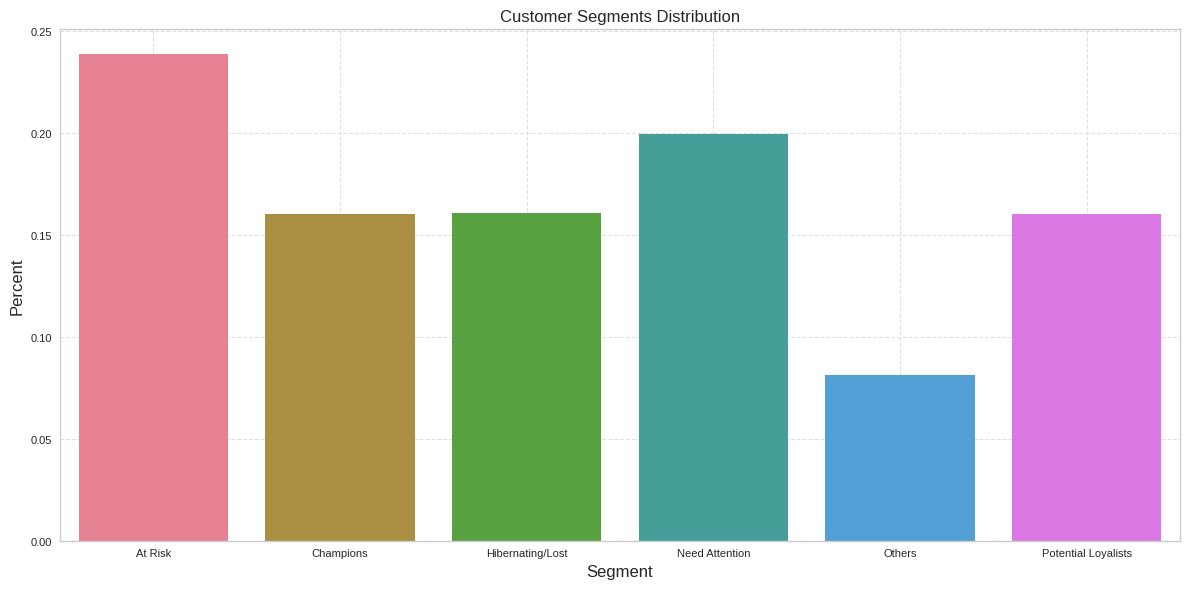

In [17]:
plot_bar(x=rfm_data_plot.index,y=rfm_data_plot.values/rfm_data_plot.sum(), title='Customer Segments Distribution', xlabel='Segment', ylabel='Percent', save_path='customer_segments_distribution.png')

In [18]:
rfm_plot2 = rfm_data[['Recency', 'Frequency', 'Monetary']].mean()
rfm_plot2

,Recency,Frequency,Monetary
Segment,,,
At Risk,400.591484,1.048903,216.706212
Champions,95.246973,1.095110,237.060339
Hibernating/Lost,401.522204,1.000000,216.058646
Need Attention,173.550513,1.000000,196.129633
Others,225.782220,1.087862,216.072807
Potential Loyalists,95.618907,1.000000,205.837703


/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/average_recency_by_segment.png


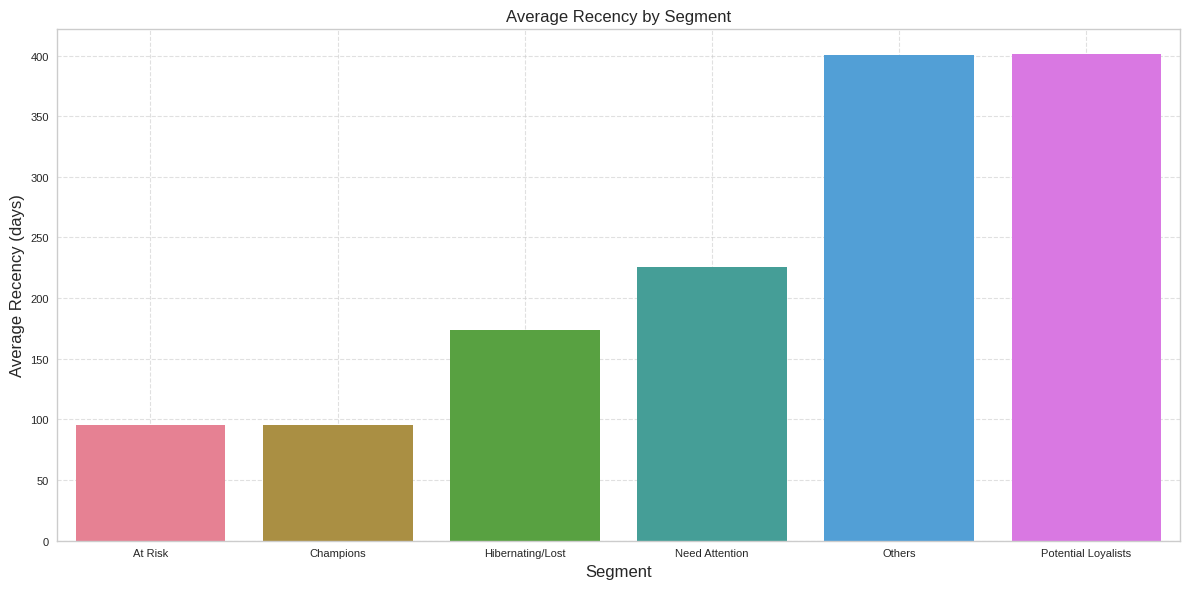

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/average_frequency_by_segment.png


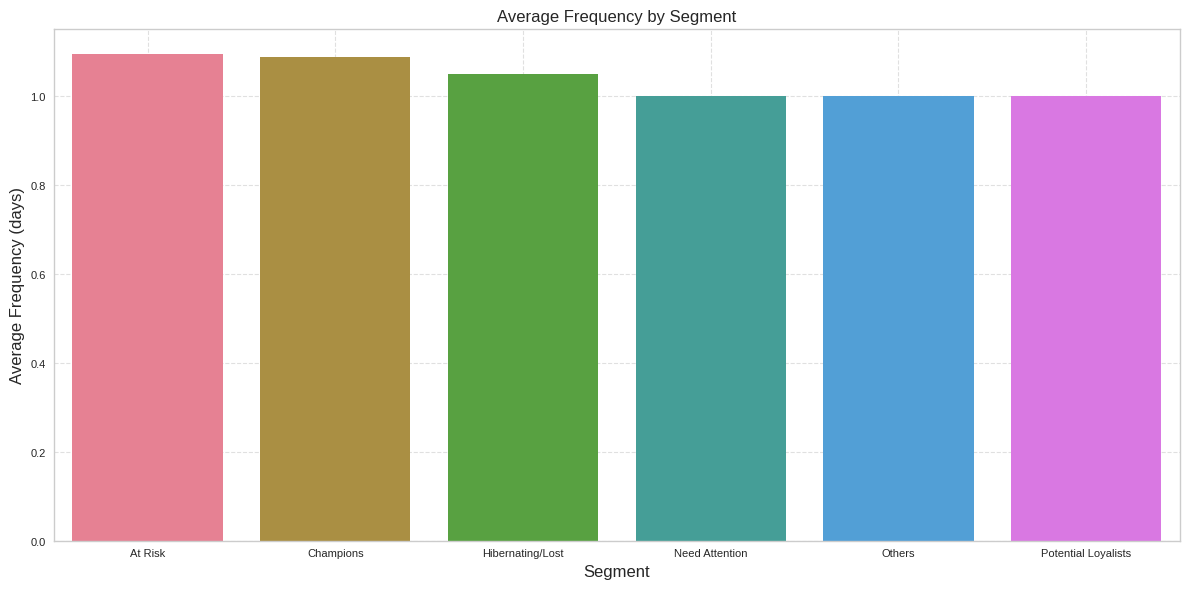

/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


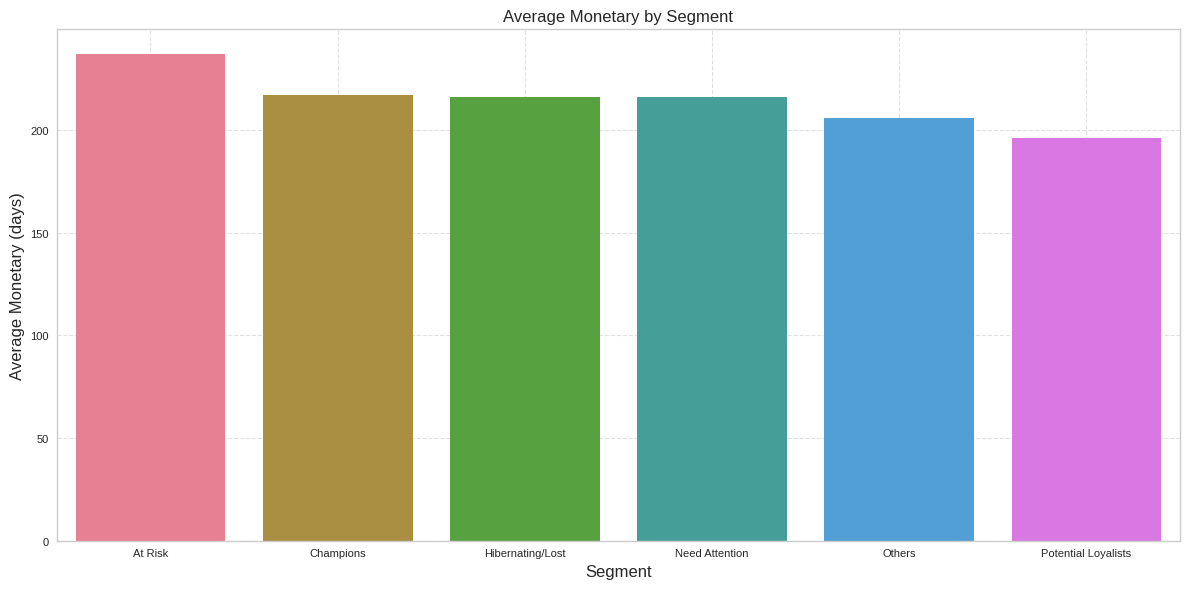

In [19]:
plot_bar(rfm_plot2.index, rfm_plot2['Recency'].sort_values(ascending=True), title='Average Recency by Segment', xlabel='Segment', ylabel='Average Recency (days)', save_path='average_recency_by_segment.png')
plot_bar(rfm_plot2.index, rfm_plot2['Frequency'].sort_values(ascending=False), title='Average Frequency by Segment', xlabel='Segment', ylabel='Average Frequency (days)', save_path='average_frequency_by_segment.png')
plot_bar(rfm_plot2.index, rfm_plot2['Monetary'].sort_values(ascending=False), title='Average Monetary by Segment', xlabel='Segment', ylabel='Average Monetary (days)')

In [20]:
# The mean monetary value can be distorted by outliers. So let's analyze the whole data in order to compare if the distribution is skewed.

rfm_data.describe()

Recency                                              \
                       count        mean        std    min    25%    50%   
Segment                                                                    
At Risk              22780.0  400.591484  93.938784  274.0  319.0  388.0   
Champions            15277.0   95.246973  51.491349    1.0   46.0   97.0   
Hibernating/Lost     15335.0  401.522204  94.078823  274.0  319.0  390.0   
Need Attention       19015.0  173.550513  74.121734    5.0  120.0  195.0   
Others                7728.0  225.782220  26.671512  183.0  202.0  224.0   
Potential Loyalists  15285.0   95.618907  51.515791    5.0   47.0   98.0   

                                  Frequency                                \
                       75%    max     count      mean       std  min  25%   
Segment                                                                     
At Risk              472.0  729.0   22780.0  1.048903  0.234210  1.0  1.0   
Champions            139.0  182.0   15277.0  1.095110  0.366759  1.0  1.0   
Hibernating/Lost     473.0  729.0   15335.0  1.000000  0.000000  1.0  1.0   
Need Attention       231.0  273.0   19015.0  1.000000  0.000000  1.0  1.0   
Others               247.0  273.0    7728.0  1.087862  0.324038  1.0  1.0   
Potential Loyalists  140.0  182.0   15285.0  1.000000  0.000000  1.0  1.0   

                                    Monetary                                  \
                     50%  75%   max    count        mean          std    min   
Segment                                                                        
At Risk              1.0  1.0   6.0  22780.0  216.706212   551.426798   0.00   
Champions            1.0  1.0  16.0  15277.0  237.060339   649.015504  10.89   
Hibernating/Lost     1.0  1.0   1.0  15335.0  216.058646  1043.945784  11.63   
Need Attention       1.0  1.0   1.0  19015.0  196.129633   399.864825   9.59   
Others               1.0  1.0   9.0   7728.0  216.072807   658.189758  13.78   
Potential Loyalists  1.0  1.0   1.0  15285.0  205.837703   465.684001  12.39   

                                                          
                        25%     50%       75%        max  
Segment                                                   
At Risk              64.100  112.81  209.1025   45256.00  
Champions            67.130  120.53  216.3100   30186.00  
Hibernating/Lost     62.780  108.10  196.9900  109312.64  
Need Attention       62.925  110.36  193.4650   19174.38  
Others               64.530  116.24  210.3525   44048.00  
Potential Loyalists  63.160  113.25  197.9900   29099.52

In [21]:
# As we can see, the monetary value is the only one that is highly skewed. Let's use the median to represent it better.
rfm_plot2['Monetary'] = rfm_data['Monetary'].median()
rfm_plot2

,Recency,Frequency,Monetary
Segment,,,
At Risk,400.591484,1.048903,112.81
Champions,95.246973,1.095110,120.53
Hibernating/Lost,401.522204,1.000000,108.10
Need Attention,173.550513,1.000000,110.36
Others,225.782220,1.087862,116.24
Potential Loyalists,95.618907,1.000000,113.25


/home/lucas/olist-data-analysis-project/notebooks/../src/viz.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette=colors, hue=hue, orient=orientation)


Plot saved at: /home/lucas/olist-data-analysis-project/notebooks/../outputs/figures/median_monetary_by_segment.png


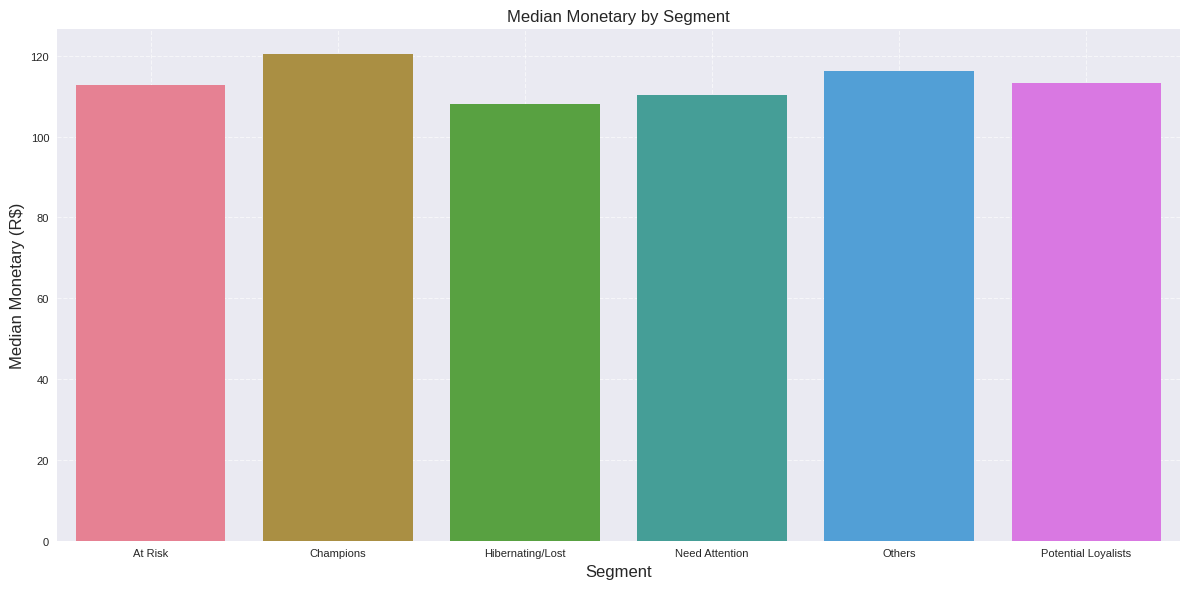

In [24]:
plot_bar(rfm_plot2.index, rfm_plot2['Monetary'], title='Median Monetary by Segment', xlabel='Segment', ylabel='Median Monetary (R$)', save_path='median_monetary_by_segment.png')

### Insight: Customer Base is Defined by Recency, with Critically Low Loyalty

The RFM analysis reveals a customer base heavily skewed towards single-purchase clients, making **Recency** the most critical factor for segmentation. The business faces a significant challenge in customer retention.

* **Dominance of Single Purchases:** The descriptive statistics show that the vast majority of clients (over 75%) have a purchase Frequency of just 1. This indicates that the standard "loyal customer" model is not representative of Olist's current business, which is highly dependent on new customer acquisition.

* **"At Risk" is the Largest Segment:** Contrary to a healthy customer base, the largest segment is "At Risk," comprising over 22,000 customers who have not purchased in a long time. Combined with the "Hibernating/Lost" segment, it's clear that a massive portion of the customer base is inactive.

* **Monetary Value is Consistent:** The median monetary value is surprisingly consistent across all segments (ranging from R$108 to R$120). This suggests that the value per transaction is similar regardless of the customer's loyalty, reinforcing that the primary business challenge is not to increase the ticket size, but to encourage a second purchase.

**Business Implication:** The core business strategy must pivot aggressively towards **customer retention and re-engagement**. The largest and most immediate opportunity lies in creating targeted campaigns to reactivate the massive "At Risk" and "Need Attention" segments. Fostering what is currently a very rare behavior—the second purchase—is the most crucial lever for sustainable growth.

---
## Next Steps & Future Analysis

This RFM analysis provides a solid foundation for understanding the customer base. The logical next steps to further enrich this analysis, which will be implemented as new skills are acquired, are:

* **Automated Segmentation with KMeans:** Apply the KMeans clustering algorithm to the R, F, and M scores to identify data-driven segments, which can then be compared to our rule-based segments.
* **Deep Dive into "Champions" vs. "Lost":** Perform a comparative analysis between the best and worst customer segments to identify key differences in product choices, geographic location, and other behaviors.